In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

# CFAR-10 데이터 세트를 적재한다.
# 훈련 세트와 테스트 세트를 반환받는다. 
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

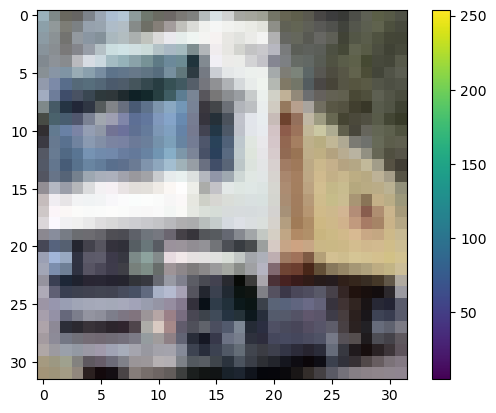

In [2]:
# 두 번째 영상(트럭)을 화면에 표시한다. 
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

# 영상의 픽셀 값을 0에서 1 사이로 변환한다. 
X_train = X_train/255.0
X_test = X_test/255.0

In [3]:
# 순차 모델을 구축한다. 
model = Sequential()
model.add(Conv2D(64, activation = 'relu', kernel_size = (3,3 )))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, activation = 'relu', kernel_size = (3,3 )))
model.add(Flatten(input_shape = (32, 32, 3)))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
# 모델을 컴파일한다. 
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# 모델을 훈련한다. 
history = model.fit(X_train, y_train, epochs=10, verbose=1, 
                  validation_split=0.3)

Epoch 1/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 45s 38ms/step - accuracy: 0.3674 - loss: 1.7258 - val_accuracy: 0.5307 - val_loss: 1.3171
Epoch 2/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.5683 - loss: 1.2118 - val_accuracy: 0.5959 - val_loss: 1.1450
Epoch 3/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.6323 - loss: 1.0423 - val_accuracy: 0.6239 - val_loss: 1.0564
Epoch 4/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 43s 39ms/step - accuracy: 0.6787 - loss: 0.9205 - val_accuracy: 0.6224 - val_loss: 1.0710
Epoch 5/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 49s 45ms/step - accuracy: 0.7131 - loss: 0.8254 - val_accuracy: 0.6435 - val_loss: 1.0477
Epoch 6/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 84s 47ms/step - accuracy: 0.7395 - loss: 0.7431 - val_accuracy: 0.6416 - val_loss: 1.0395
Epoch 7/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.7658 - loss: 0.6720 - val_accuracy: 0.6424 - val_loss: 1.0809
Epoch 8/10
1094/1094 ━━━━━━━━━━━━━━━━━━━━ 53s 48ms/step - accuracy: 0.7920 -

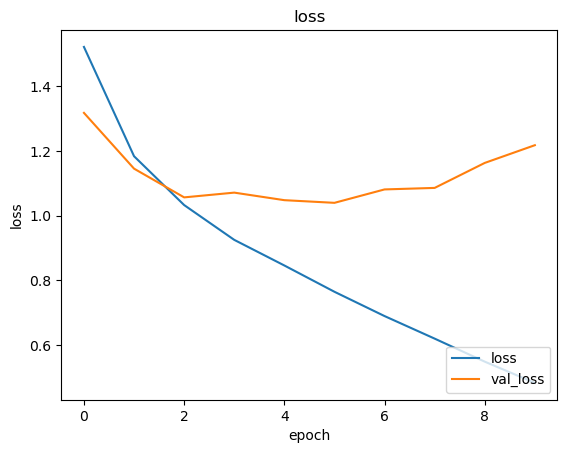

In [5]:
# 손실값을 그래프로 그린다. 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc = 'lower right')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
정답= [3]
예측값= [9.3837461e-04 2.2367266e-04 4.1461466e-03 9.2079246e-01 9.5388219e-03
 1.3789697e-02 7.6374557e-04 1.4548654e-03 4.7003757e-02 1.3485150e-03]


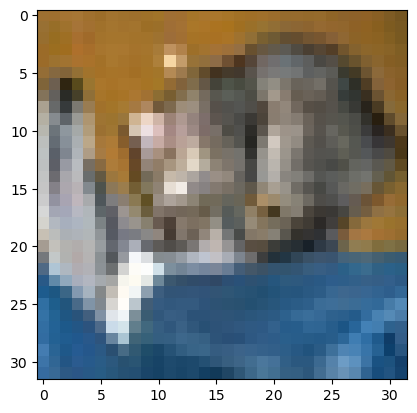

In [6]:
plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=", y_test[0])
print("예측값=", y_pred[0])